In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlrose_hiive import ExpDecay, OneMax, DiscreteOpt
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner
from mlrose_hiive import FlipFlopGenerator, KnapsackGenerator

In [2]:
sizes = [100, 500, 1000]
seeds = [10, 21, 42, 84, 168]
# Create an empty DataFrame to store the results
columns = ['Algorithm', 'Problem_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
df_results = pd.DataFrame(columns=columns)

# Run optimization algorithms for each problem size and seed
for size in sizes:
    for seed in seeds:
        # Define the fitness function
        fitness = OneMax()

        # Define the problem using DiscreteOpt
        one_max_problem = DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)

        # Define optimization algorithms
        one_max_algorithms = {
            'RHC': RHCRunner(problem=one_max_problem, experiment_name=f'one_max_rhc_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), restart_list=[0]),
            'SA': SARunner(problem=one_max_problem, experiment_name=f'one_max_sa_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), temperature_list=[ExpDecay(init_temp=256, exp_const=0.1, min_temp=1.0)]),
            'GA': GARunner(problem=one_max_problem, experiment_name=f'one_max_ga_{size}_{seed}', seed=seed,  iteration_list=2**np.arange(10), population_sizes=[100], mutation_rates=[0.8]),
            'MIMIC': MIMICRunner(problem=one_max_problem, experiment_name=f'one_max_mimic_{size}_{seed}', seed=seed, use_fast_mimic=True, max_attempts=5, iteration_list=2**np.arange(10), population_sizes=[100], keep_percent_list=[0.2])
        }

        # Run optimization algorithms for current problem size and seed
        for name, algorithm in one_max_algorithms.items():
            print(f"Running {name} Algorithm with size {size} and seed {seed}...")
            results = algorithm.run()

            # Extract fitness curve data
            fitness_curve = results[1]

            # Create a DataFrame for the current algorithm, problem size, and seed
            df_temp = pd.DataFrame(fitness_curve, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add algorithm, problem size, and seed to the DataFrame
            df_temp['Algorithm'] = name
            df_temp['Problem_Size'] = size
            df_temp['Seed'] = seed

            # Append the DataFrame to the results DataFrame
            df_results = pd.concat([df_results, df_temp], ignore_index=True)

# Compute the average fitness for each algorithm, problem size, and seed
average_one_max_results = df_results.groupby(['Algorithm', 'Problem_Size', 'Iteration']).mean().reset_index()

Running RHC Algorithm with size 100 and seed 10...
Running SA Algorithm with size 100 and seed 10...
Running GA Algorithm with size 100 and seed 10...
Running MIMIC Algorithm with size 100 and seed 10...
Running RHC Algorithm with size 100 and seed 21...
Running SA Algorithm with size 100 and seed 21...
Running GA Algorithm with size 100 and seed 21...
Running MIMIC Algorithm with size 100 and seed 21...
Running RHC Algorithm with size 100 and seed 42...
Running SA Algorithm with size 100 and seed 42...
Running GA Algorithm with size 100 and seed 42...
Running MIMIC Algorithm with size 100 and seed 42...
Running RHC Algorithm with size 100 and seed 84...
Running SA Algorithm with size 100 and seed 84...
Running GA Algorithm with size 100 and seed 84...
Running MIMIC Algorithm with size 100 and seed 84...
Running RHC Algorithm with size 100 and seed 168...
Running SA Algorithm with size 100 and seed 168...
Running GA Algorithm with size 100 and seed 168...
Running MIMIC Algorithm with s

In [3]:
sizes = [50, 250, 500]
seeds = [10, 21, 42, 84, 168]

# Create an empty DataFrame to store the results
columns = ['Algorithm', 'Problem_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
df_results = pd.DataFrame(columns=columns)

# Run optimization algorithms for each problem size and seed
for size in sizes:
    for seed in seeds:
        # Define the problem using FlipFlopGenerator
        flip_flop_problem = FlipFlopGenerator().generate(seed=seed, size=size)

        # Define optimization algorithms
        flip_flop_algorithms = {
            'RHC': RHCRunner(problem=flip_flop_problem, experiment_name=f'flip_flop_rhc_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), max_attempts=100, restart_list=[75]),
            'SA': SARunner(problem=flip_flop_problem, experiment_name=f'flip_flop_sa_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), max_attempts=100, temperature_list =[ExpDecay(init_temp=256, exp_const=0.1, min_temp=0.001)]),
            'GA': GARunner(problem=flip_flop_problem, experiment_name=f'flip_flop_ga_{size}_{seed}', seed=seed,  iteration_list=2**np.arange(10), max_attempts=100, population_sizes=[800], mutation_rates=[0.8]),
            'MIMIC': MIMICRunner(problem=flip_flop_problem, experiment_name=f'flip_flop_mimic_{size}_{seed}', seed=seed, use_fast_mimic=True, max_attempts=5, iteration_list=2**np.arange(10),  population_sizes=[800], keep_percent_list=[0.2])
        }

        # Run optimization algorithms for current problem size and seed
        for name, algorithm in flip_flop_algorithms.items():
            print(f"Running {name} Algorithm with size {size} and seed {seed}...")
            results = algorithm.run()

            # Extract fitness curve data
            fitness_curve = results[1]

            # Create a DataFrame for the current algorithm, problem size, and seed
            df_temp = pd.DataFrame(fitness_curve, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add algorithm, problem size, and seed to the DataFrame
            df_temp['Algorithm'] = name
            df_temp['Problem_Size'] = size
            df_temp['Seed'] = seed

            # Append the DataFrame to the results DataFrame
            df_results = pd.concat([df_results, df_temp], ignore_index=True)

# Compute the average fitness for each algorithm, problem size, and seed
average_flip_flop_results = df_results.groupby(['Algorithm', 'Problem_Size', 'Iteration']).mean().reset_index()

Running RHC Algorithm with size 50 and seed 10...
Running SA Algorithm with size 50 and seed 10...
Running GA Algorithm with size 50 and seed 10...
Running MIMIC Algorithm with size 50 and seed 10...
Running RHC Algorithm with size 50 and seed 21...
Running SA Algorithm with size 50 and seed 21...
Running GA Algorithm with size 50 and seed 21...
Running MIMIC Algorithm with size 50 and seed 21...
Running RHC Algorithm with size 50 and seed 42...
Running SA Algorithm with size 50 and seed 42...
Running GA Algorithm with size 50 and seed 42...
Running MIMIC Algorithm with size 50 and seed 42...
Running RHC Algorithm with size 50 and seed 84...
Running SA Algorithm with size 50 and seed 84...
Running GA Algorithm with size 50 and seed 84...
Running MIMIC Algorithm with size 50 and seed 84...
Running RHC Algorithm with size 50 and seed 168...
Running SA Algorithm with size 50 and seed 168...
Running GA Algorithm with size 50 and seed 168...
Running MIMIC Algorithm with size 50 and seed 168

In [6]:
sizes = [(25, 15, 50, 50, 0.4), (50, 30, 100, 100, 0.8), (100, 60, 200, 200, 1.0)]
seeds = [10, 21, 42, 84, 168]

# Create an empty DataFrame to store the results
columns = ['Algorithm', 'Problem_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
df_results = pd.DataFrame(columns=columns)

# Run optimization algorithms for each problem size and seed
for i, size in enumerate(sizes):
    for seed in seeds:
        item_types, item_count, max_weight, max_value, max_pct = size

        # Define the problem using KnapsackGenerator
        knapsack_problem = KnapsackGenerator().generate(seed=seed, number_of_items_types=item_types, max_item_count=item_count, max_weight_per_item=max_weight, max_value_per_item=max_value, max_weight_pct=max_pct)
        
        # Define optimization algorithms
        knapsack_algorithms = {
            'RHC': RHCRunner(problem=knapsack_problem, experiment_name=f'knapsack_rhc_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), max_attempts=100, restart_list=[75]),
            'SA': SARunner(problem=knapsack_problem, experiment_name=f'knapsack_sa_{size}_{seed}', seed=seed, iteration_list=2**np.arange(10), max_attempts=100, temperature_list =[ExpDecay(init_temp=128, exp_const=0.1, min_temp=0.001)]),
            'GA': GARunner(problem=knapsack_problem, experiment_name=f'knapsack_ga_{size}_{seed}', seed=seed,  iteration_list=2**np.arange(10), max_attempts=100, population_sizes=[400], mutation_rates=[1.0]),
            'MIMIC': MIMICRunner(problem=knapsack_problem, experiment_name=f'knapsack_mimic_{size}_{seed}', seed=seed, use_fast_mimic=True, max_attempts=5, iteration_list=2**np.arange(10), population_sizes=[1000], keep_percent_list=[0.5])
        }

        # Run optimization algorithms for current problem size and seed
        for name, algorithm in knapsack_algorithms.items():
            print(f"Running {name} Algorithm with size {size} and seed {seed}...")
            results = algorithm.run()

            # Extract fitness curve data
            fitness_curve = results[1]

            # Create a DataFrame for the current algorithm, problem size, and seed
            df_temp = pd.DataFrame(fitness_curve, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add algorithm, problem size, and seed to the DataFrame
            df_temp['Algorithm'] = name
            df_temp['Problem_Size'] = i
            df_temp['Seed'] = seed

            # Append the DataFrame to the results DataFrame
            df_results = pd.concat([df_results, df_temp], ignore_index=True)

# Compute the average fitness for each algorithm, problem size, and seed
average_knapsack_results = df_results.groupby(['Algorithm', 'Problem_Size', 'Iteration']).mean().reset_index()

Running RHC Algorithm with size (25, 15, 50, 50, 0.4) and seed 10...
Running SA Algorithm with size (25, 15, 50, 50, 0.4) and seed 10...
Running GA Algorithm with size (25, 15, 50, 50, 0.4) and seed 10...
Running MIMIC Algorithm with size (25, 15, 50, 50, 0.4) and seed 10...
Running RHC Algorithm with size (25, 15, 50, 50, 0.4) and seed 21...
Running SA Algorithm with size (25, 15, 50, 50, 0.4) and seed 21...
Running GA Algorithm with size (25, 15, 50, 50, 0.4) and seed 21...
Running MIMIC Algorithm with size (25, 15, 50, 50, 0.4) and seed 21...
Running RHC Algorithm with size (25, 15, 50, 50, 0.4) and seed 42...
Running SA Algorithm with size (25, 15, 50, 50, 0.4) and seed 42...
Running GA Algorithm with size (25, 15, 50, 50, 0.4) and seed 42...
Running MIMIC Algorithm with size (25, 15, 50, 50, 0.4) and seed 42...
Running RHC Algorithm with size (25, 15, 50, 50, 0.4) and seed 84...
Running SA Algorithm with size (25, 15, 50, 50, 0.4) and seed 84...
Running GA Algorithm with size (25,

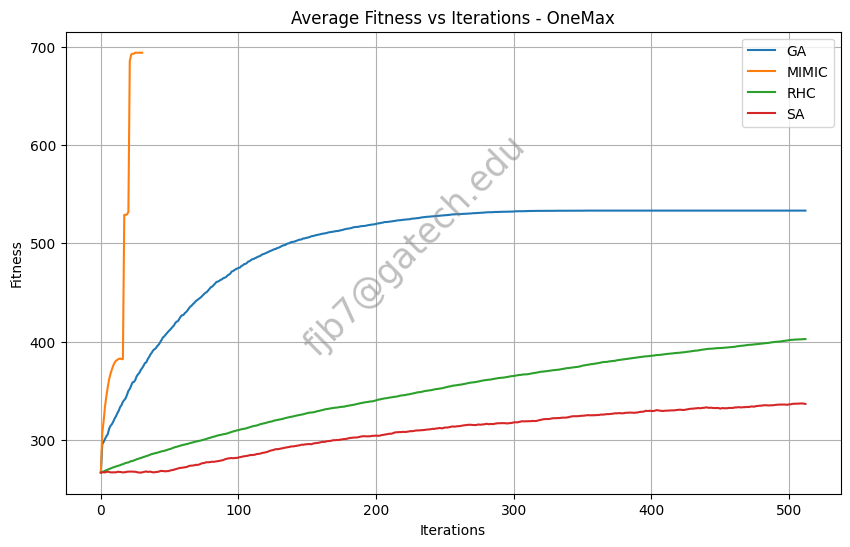

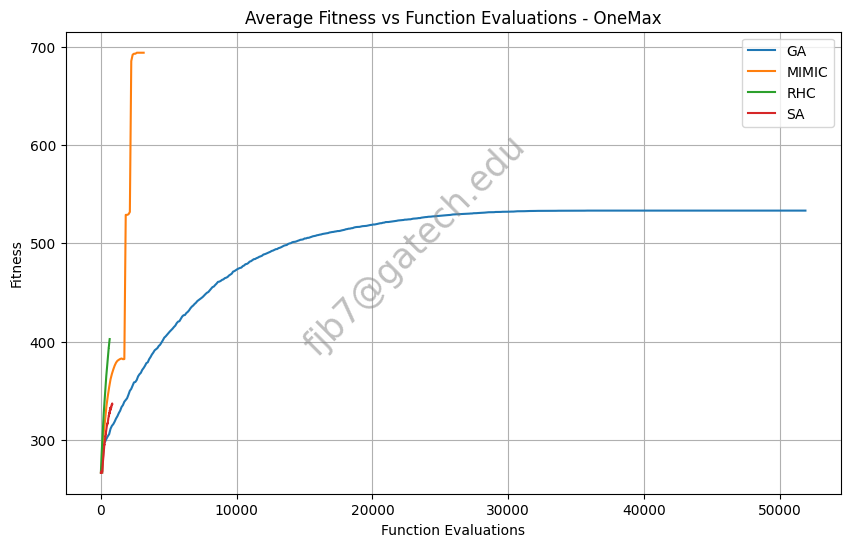

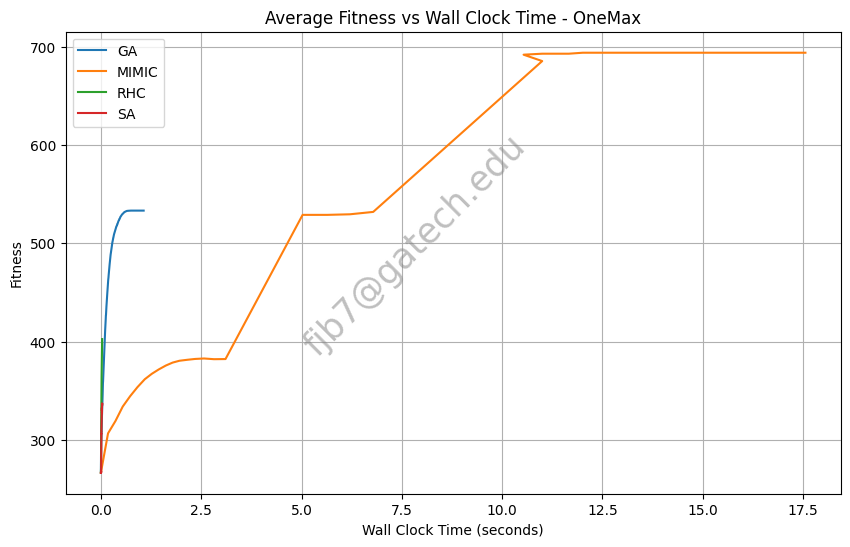

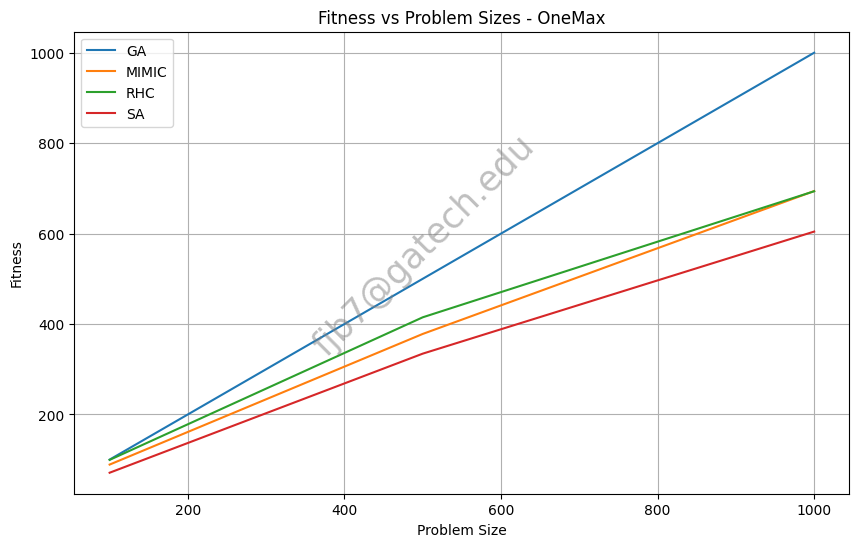

In [4]:
# Compute the average fitness across problem sizes for each algorithm and iteration
average_fitness_per_algorithm = average_one_max_results.groupby(['Algorithm', 'Iteration'])['Fitness'].mean().reset_index()
# Compute the average function evaluations and time across problem sizes for each algorithm and iteration
average_fevals_per_algorithm = average_one_max_results.groupby(['Algorithm', 'Iteration'])['FEvals'].mean().reset_index()
average_time_per_algorithm = average_one_max_results.groupby(['Algorithm', 'Iteration'])['Time'].mean().reset_index()

# Since we want to plot Fitness vs FEvals and Fitness vs Time, we merge the average_fitness with average_fevals and average_time
average_fitness_fevals = pd.merge(average_fitness_per_algorithm, average_fevals_per_algorithm, on=['Algorithm', 'Iteration'])
average_fitness_time = pd.merge(average_fitness_per_algorithm, average_time_per_algorithm, on=['Algorithm', 'Iteration'])

# Plot 1: Fitness vs. Iterations (Epochs) - This one is correct as per your initial code
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Iterations - OneMax')
for algorithm in average_fitness_per_algorithm['Algorithm'].unique():
    subset = average_fitness_per_algorithm[average_fitness_per_algorithm['Algorithm'] == algorithm]
    plt.plot(subset['Iteration'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_iterations.png")
plt.show()

# Plot 2: Average Fitness vs. Function Evaluations
plt.figure(figsize=(10, 6))
plt.xlabel('Function Evaluations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Function Evaluations - OneMax')
for algorithm in average_fitness_fevals['Algorithm'].unique():
    subset = average_fitness_fevals[average_fitness_fevals['Algorithm'] == algorithm]
    plt.plot(subset['FEvals'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_feval.png")
plt.show()

# Plot 3: Average Fitness vs. Wall Clock Time
plt.figure(figsize=(10, 6))
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Wall Clock Time - OneMax')
for algorithm in average_fitness_time['Algorithm'].unique():
    subset = average_fitness_time[average_fitness_time['Algorithm'] == algorithm]
    plt.plot(subset['Time'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_wall_clock_time.png")
plt.show()

# Plot 4: Fitness vs. Problem Size
plt.figure(figsize=(10, 6))
problem_sizes = sorted(set(average_one_max_results['Problem_Size']))
algorithms = sorted(set(average_one_max_results['Algorithm']))

for algorithm in algorithms:
    fitness_values = []
    for problem_size in problem_sizes:
        subset = average_one_max_results[(average_one_max_results['Algorithm'] == algorithm) & (average_one_max_results['Problem_Size'] == problem_size)]
        fitness_values.append(subset['Fitness'].iloc[-1])
    plt.plot(problem_sizes, fitness_values, label=algorithm)

plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Sizes - OneMax')
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.legend()
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_problem_size.png")
plt.show()

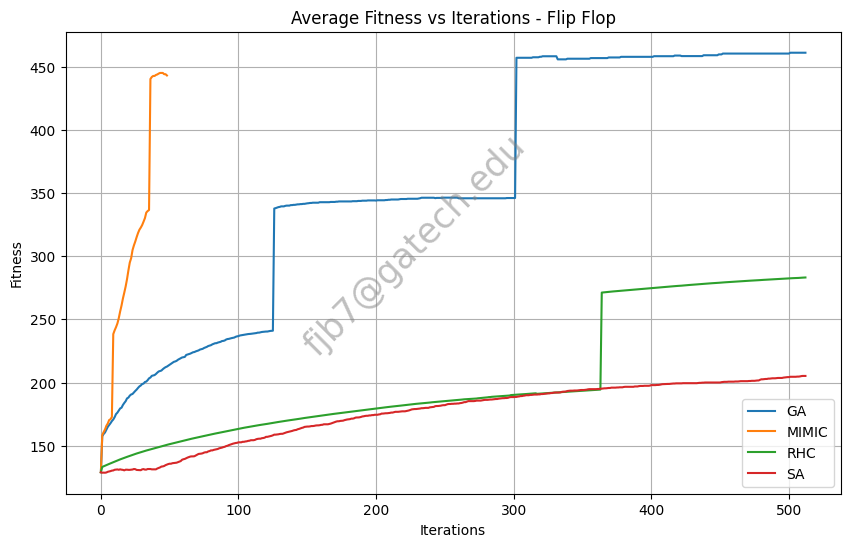

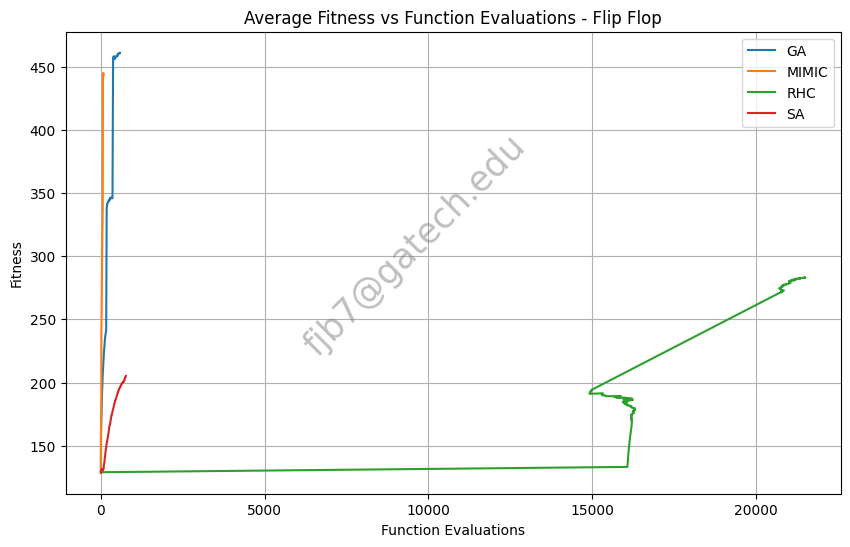

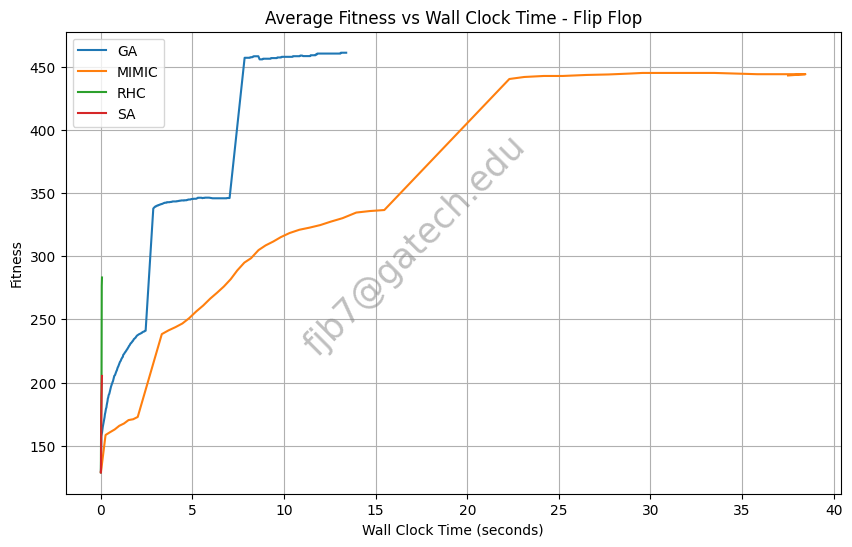

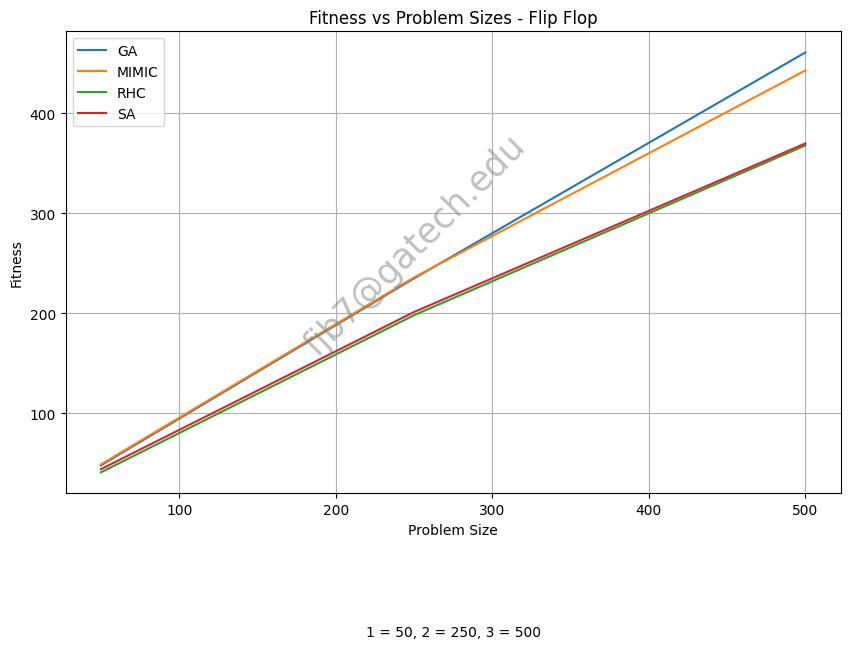

In [5]:
# Compute the average fitness across problem sizes for each algorithm and iteration
average_fitness_per_algorithm = average_flip_flop_results.groupby(['Algorithm', 'Iteration'])['Fitness'].mean().reset_index()
# Compute the average function evaluations and time across problem sizes for each algorithm and iteration
average_fevals_per_algorithm = average_flip_flop_results.groupby(['Algorithm', 'Iteration'])['FEvals'].mean().reset_index()
average_time_per_algorithm = average_flip_flop_results.groupby(['Algorithm', 'Iteration'])['Time'].mean().reset_index()

# Since we want to plot Fitness vs FEvals and Fitness vs Time, we merge the average_fitness with average_fevals and average_time
average_fitness_fevals = pd.merge(average_fitness_per_algorithm, average_fevals_per_algorithm, on=['Algorithm', 'Iteration'])
average_fitness_time = pd.merge(average_fitness_per_algorithm, average_time_per_algorithm, on=['Algorithm', 'Iteration'])

# Plot 1: Fitness vs. Iterations (Epochs) - This one is correct as per your initial code
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Iterations - Flip Flop')
for algorithm in average_fitness_per_algorithm['Algorithm'].unique():
    subset = average_fitness_per_algorithm[average_fitness_per_algorithm['Algorithm'] == algorithm]
    plt.plot(subset['Iteration'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/flip_flop/fitness_v_iterations.png")
plt.show()

# Plot 2: Average Fitness vs. Function Evaluations
plt.figure(figsize=(10, 6))
plt.xlabel('Function Evaluations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Function Evaluations - Flip Flop')
for algorithm in average_fitness_fevals['Algorithm'].unique():
    subset = average_fitness_fevals[average_fitness_fevals['Algorithm'] == algorithm]
    plt.plot(subset['FEvals'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/flip_flop/fitness_v_feval.png")
plt.show()

# Plot 3: Average Fitness vs. Wall Clock Time
plt.figure(figsize=(10, 6))
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Wall Clock Time - Flip Flop')
for algorithm in average_fitness_time['Algorithm'].unique():
    subset = average_fitness_time[average_fitness_time['Algorithm'] == algorithm]
    plt.plot(subset['Time'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_wall_clock_time.png")
plt.show()

# Plot 4: Fitness vs. Problem Size
plt.figure(figsize=(10, 6))
problem_sizes = sorted(set(average_flip_flop_results['Problem_Size']))
algorithms = sorted(set(average_flip_flop_results['Algorithm']))

for algorithm in algorithms:
    fitness_values = []
    for problem_size in problem_sizes:
        subset = average_flip_flop_results[(average_flip_flop_results['Algorithm'] == algorithm) & (average_flip_flop_results['Problem_Size'] == problem_size)]
        fitness_values.append(subset['Fitness'].iloc[-1])
    plt.plot(problem_sizes, fitness_values, label=algorithm)
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Sizes - Flip Flop')
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/one_max/fitness_v_problem_size.png")
plt.show()

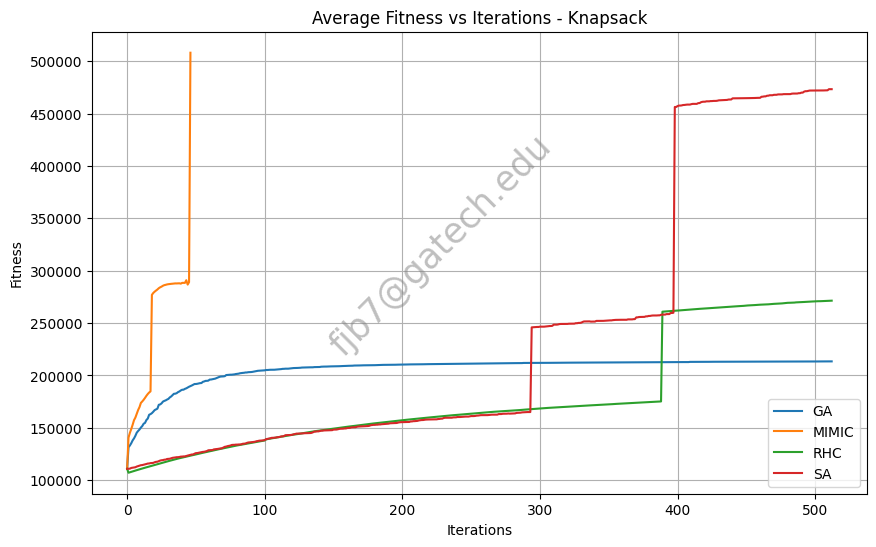

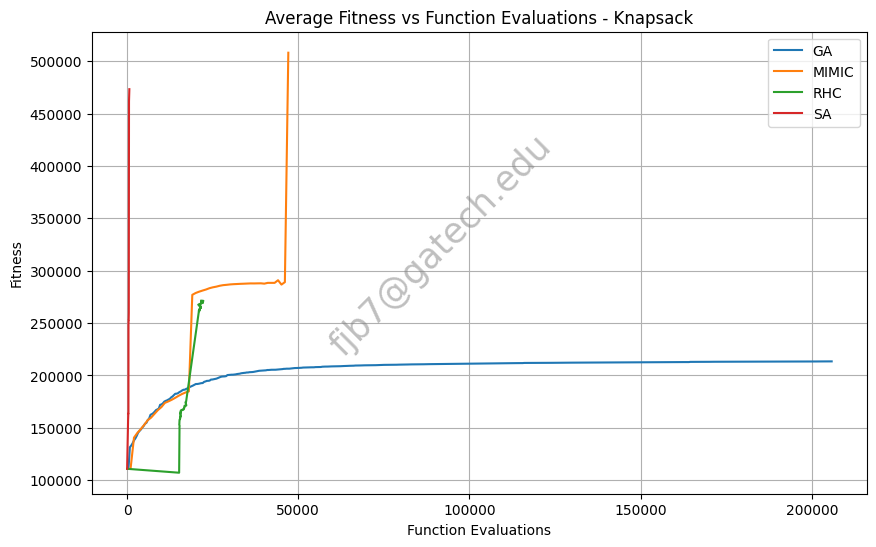

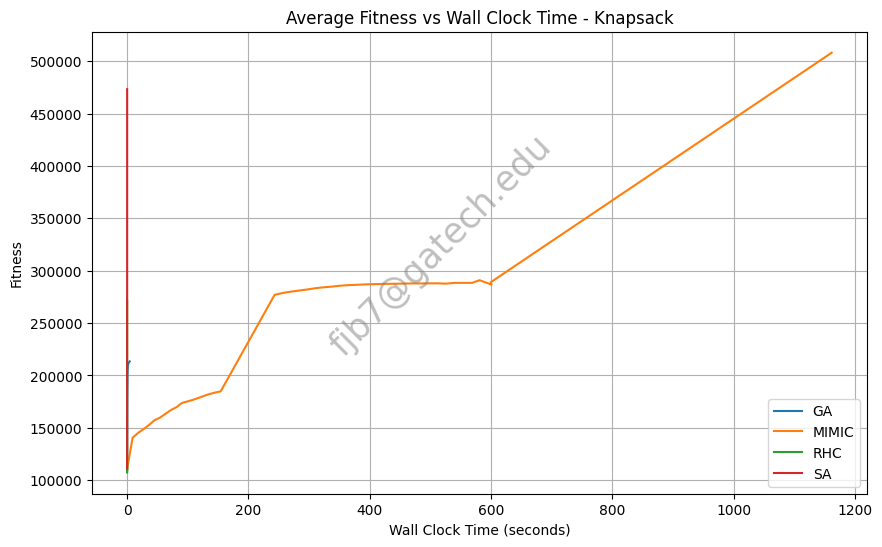

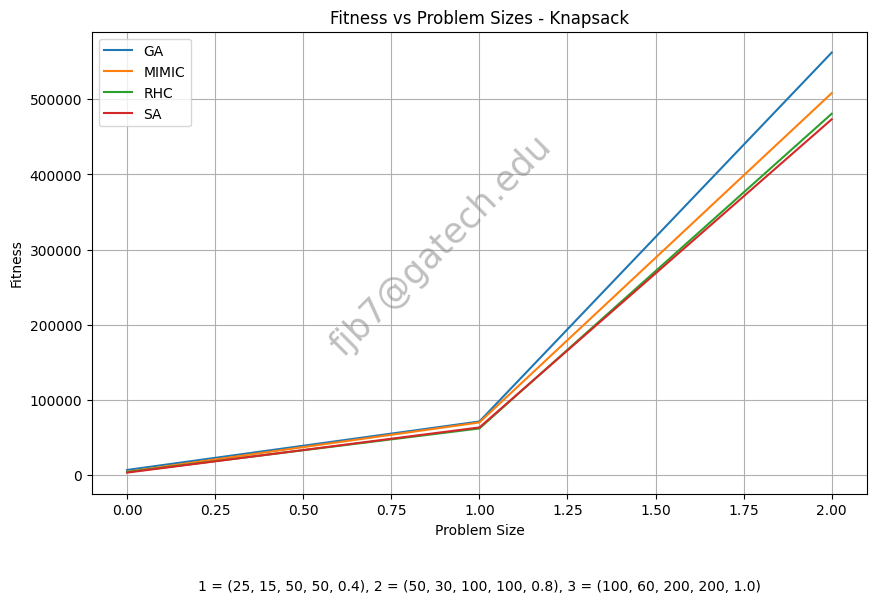

In [8]:
# Compute the average fitness across problem sizes for each algorithm and iteration
average_fitness_per_algorithm = average_knapsack_results.groupby(['Algorithm', 'Iteration'])['Fitness'].mean().reset_index()
# Compute the average function evaluations and time across problem sizes for each algorithm and iteration
average_fevals_per_algorithm = average_knapsack_results.groupby(['Algorithm', 'Iteration'])['FEvals'].mean().reset_index()
average_time_per_algorithm = average_knapsack_results.groupby(['Algorithm', 'Iteration'])['Time'].mean().reset_index()

# Since we want to plot Fitness vs FEvals and Fitness vs Time, we merge the average_fitness with average_fevals and average_time
average_fitness_fevals = pd.merge(average_fitness_per_algorithm, average_fevals_per_algorithm, on=['Algorithm', 'Iteration'])
average_fitness_time = pd.merge(average_fitness_per_algorithm, average_time_per_algorithm, on=['Algorithm', 'Iteration'])

# Plot 1: Fitness vs. Iterations (Epochs) - This one is correct as per your initial code
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Iterations - Knapsack')
for algorithm in average_fitness_per_algorithm['Algorithm'].unique():
    subset = average_fitness_per_algorithm[average_fitness_per_algorithm['Algorithm'] == algorithm]
    plt.plot(subset['Iteration'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/knapsack/fitness_v_iterations.png")
plt.show()

# Plot 2: Average Fitness vs. Function Evaluations
plt.figure(figsize=(10, 6))
plt.xlabel('Function Evaluations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Function Evaluations - Knapsack')
for algorithm in average_fitness_fevals['Algorithm'].unique():
    subset = average_fitness_fevals[average_fitness_fevals['Algorithm'] == algorithm]
    plt.plot(subset['FEvals'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/knapsack/fitness_v_feval.png")
plt.show()

# Plot 3: Average Fitness vs. Wall Clock Time
plt.figure(figsize=(10, 6))
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Wall Clock Time - Knapsack')
for algorithm in average_fitness_time['Algorithm'].unique():
    subset = average_fitness_time[average_fitness_time['Algorithm'] == algorithm]
    plt.plot(subset['Time'], subset['Fitness'], label=f"{algorithm}")
plt.legend()
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/knapsack/fitness_v_wall_clock_time.png")
plt.show()

# Plot 4: Fitness vs. Problem Size
plt.figure(figsize=(10, 6))
problem_sizes = sorted(set(average_knapsack_results['Problem_Size']))
algorithms = sorted(set(average_knapsack_results['Algorithm']))

for algorithm in algorithms:
    fitness_values = []
    for problem_size in problem_sizes:
        subset = average_knapsack_results[(average_knapsack_results['Algorithm'] == algorithm) & (average_knapsack_results['Problem_Size'] == problem_size)]
        fitness_values.append(subset['Fitness'].iloc[-1])
    plt.plot(problem_sizes, fitness_values, label=algorithm)


plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Sizes - Knapsack')
plt.legend()
plt.text(0.5, -0.2, f"1 = {sizes[0]}, 2 = {sizes[1]}, 3 = {sizes[2]}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.grid(True)
plt.savefig("./results/knapsack/fitness_v_problem_size.png")
plt.show()